In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import fsolve
import plotly.figure_factory as ff
import pandas as pd
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [31]:
def create_dataset(x,y):
    df= pd.DataFrame({'x':[x],'y':[y]})
    return df

def save_dataset(df):
    df.to_csv('./dataset.csv',index=False)


def generateRandomDataset(lim,range):
    x, y = np.meshgrid(np.linspace(-lim, lim, range), np.linspace(-lim, lim, range))
    return x,y

## Gradiente, Divergente e Rotacional

campo escalar

Campo vetorial

,x,y
0,"[[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


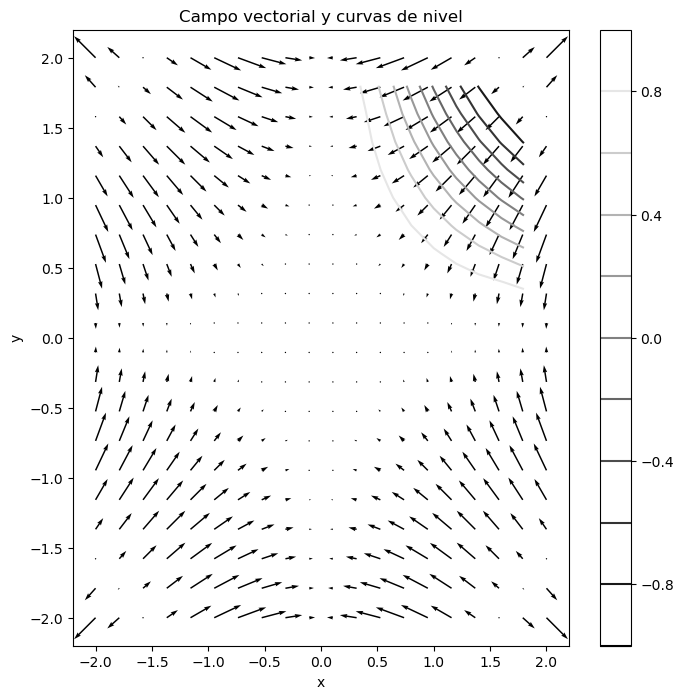

In [32]:
x, y = np.meshgrid(np.arange(0, 2, 0.2), np.arange(0, 2, 0.2))
lim = 2


z = np.cos(x*y)

x_, y_ = np.meshgrid(np.linspace(-lim, lim, 20), np.linspace(-lim, lim, 20))

vx = -np.sin(y_*x_)*y_
vy = -np.sin(y_*x_)*x_

df = create_dataset(x,y)
display(df)

plt.figure(figsize=(8,8))
plt.gray()
plt.quiver(x_, y_, vx, vy) #campo
plt.contour(x, y, z, levels=10,) #curvas de nivel
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial y curvas de nivel')
plt.colorbar()
plt.show()

Divergente

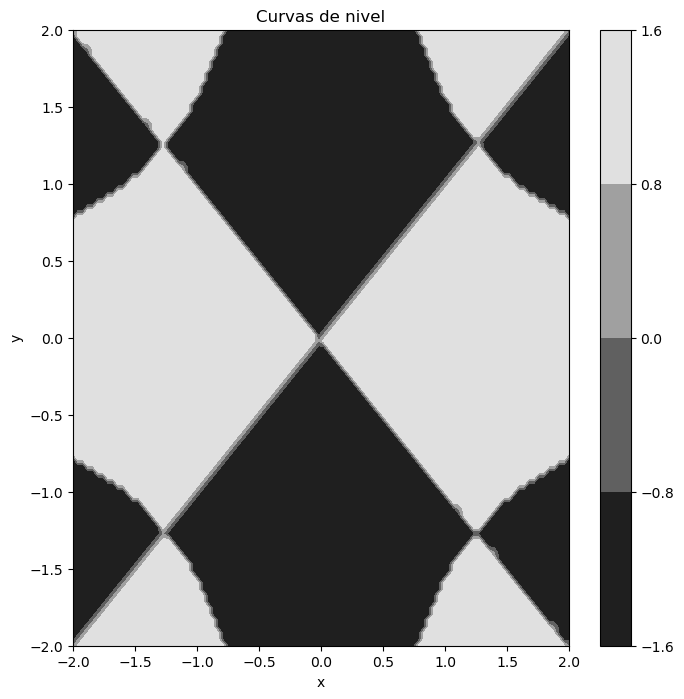

In [33]:
x,y = generateRandomDataset(2,100)

z = np.cos(x*y)*x**2 - np.cos(x*y)*y**2
z[z>0] = 1 #branco
z[z<0] = -1 #preto


# Create a figure and axis object
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.show()

plt.figure(figsize=(8,8))
plt.contourf(x, y, z, levels=2, cmap=plt.get_cmap("gray"))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel')
plt.colorbar()
plt.show()

Rotacional

Gradiente

## Calculo Vetorial

https://www.youtube.com/playlist?list=PLg0ijj_Zz1a4r6JNAIcKI3io8PKdmdMYD

In [34]:
# from Calculadora import Calculadora


class EletroMagnetismo:
    def __init__(self):
        pass


    
    def plot_campo(self, values, campo="gravitacional"):
        x, y = np.meshgrid(np.linspace(-1.5, 1.5, 15), np.linspace(-1.5, 1.5, 15))

        if campo == "gravitacional":
            vx, vy = self.campoGravitacional(values[0], values[1], x, y)
            plt.quiver(x, y, vx, vy)
        elif campo == "eletrico":
            vx, vy = self.campoEletrico(values[2], values[0], values[1], x, y)
            plt.streamplot(x, y, vx, vy)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
        
    def campoEletrico(self, q, x0, y0, x, y, k=8.9875e9):
        vx = x - x0
        vy = y - y0

        d = np.sqrt(vx**2 + vy**2)

        v = np.array([vx, vy])

        vu = v / d

        E = k * q * vu / d**2

        return E[0], E[1]

    def campoGravitacional(self,x0,y0,x,y,k= 1):
        vx = x0 - x
        vy = y0 - y

        d = np.sqrt(vx**2 + vy**2)

        v = np.array([vx,vy])

        vu = v/d

        f = k*vu/d**2

        return f[0], f[1]

    def plot_vetor(self, x, y, vx, vy,_tamanho,_label):
        fig = ff.create_quiver(
            x,
            y,
            vx,
            vy,
            scale=0.1,
            arrow_scale=_tamanho,
            name=_label,
            line_width=2,
            marker=dict(color="red"),
        )
        fig.add_trace(go.Scatter(x=[0], y=[0], mode="markers", marker=dict(color="black"),marker_size = 12, name=" Origem"))
        fig.show()

    def plot_campoMagnetico(self,values =[0,0]):
        x, y = np.meshgrid(np.linspace(-1.5,1.5,15),np.linspace(-1.5,1.5,15))

        vx, vy = self.campoGravitacional(values[0], values[1], x, y)
        # fig, ax = plt.subplots
        plt.figure(figsize=(10,10))
        # plt.streamplot(x,y,vx,vy)
        plt.quiver(x,y,vx,vy)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def plot_campoVetorial(self):
        x, y = np.meshgrid(np.linspace(-1.5,1.5,15),np.linspace(-1.5,1.5,15))

        vx, vy = self.campoGravitacional(0,0,x,y)
        # fig, ax = plt.subplots
        plt.figure(figsize=(10,10))
        plt.streamplot(x,y,vx,vy)

/tmp/ipykernel_20345/332696724.py:46: RuntimeWarning:

invalid value encountered in divide



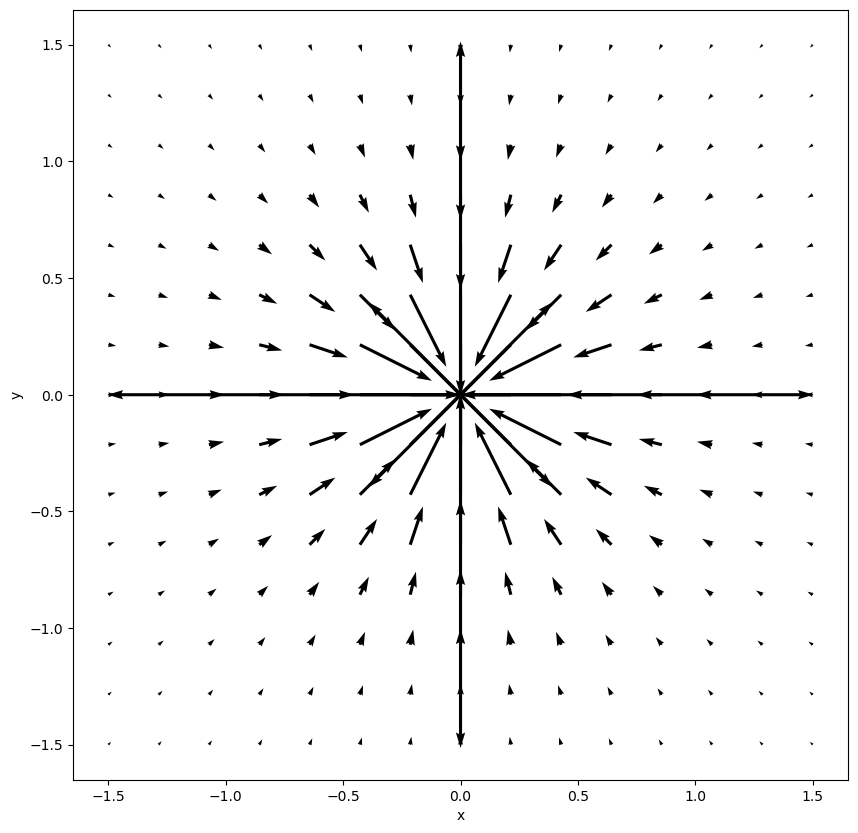

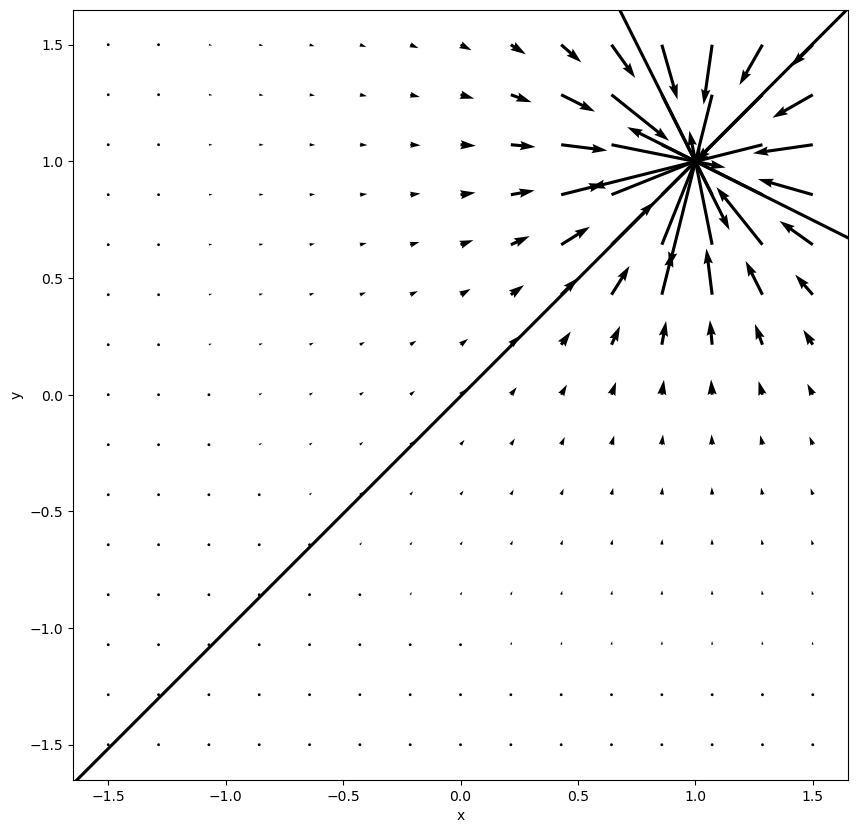

Campo Magnético: (-0.3535533905932737, -0.3535533905932737)


In [35]:
# calc = Calculadora()

eletromag = EletroMagnetismo()
eletromag.plot_campoMagnetico([0,0])
eletromag.plot_campoMagnetico([1, 1])

print(f"Campo Magnético: {eletromag.campoGravitacional(0,0,1,1)}")

In [36]:
#vetores

x,y = np.meshgrid(np.arange(0,2,0.2),np.arange(0,2,0.2))

u = np.sin(x)
v = np.sin(y)

eletromag.plot_vetor(x,y,u,v,0.5,"Campo Magnético")

## Calculo 2

## Calculo 3

## Coordenadas Cartesianas, Cilindricas e esfericas

Esfera

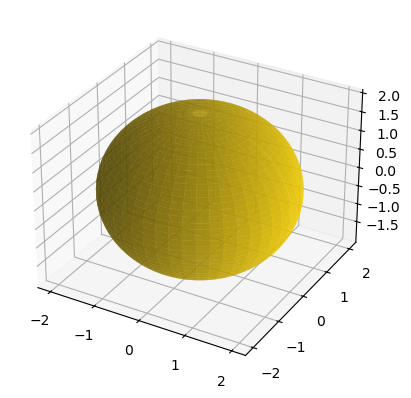

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

theta = np.arange(0, 2 * np.pi, 0.01)
phi = np.arange(0, np.pi, 0.01)

theta, phi = np.meshgrid(theta, phi)

raio = np.sqrt(4)

x = raio * np.sin(phi) * np.cos(theta)
y = raio * np.sin(phi) * np.sin(theta)
z = raio * np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x, y, z, color="gold", alpha=0.7)

plt.show()

In [38]:
import numpy as np
import plotly.graph_objects as go

# Define as coordenadas das cargas
coordenadas_cargas = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

# Cria uma figura tridimensional
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=[c[0] for c in coordenadas_cargas],
            y=[c[1] for c in coordenadas_cargas],
            z=[c[2] for c in coordenadas_cargas],
            mode="markers",
            marker=dict(size=10, color="blue", opacity=0.8),  # Define a cor das cargas
        )
    ]
)

# Adiciona a superfície da esfera
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Converte coordenadas esféricas para coordenadas cartesianas
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Adiciona a superfície da esfera ao gráfico
fig.add_trace(go.Surface(x=x, y=y, z=z))

# Atualiza o layout do gráfico
fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z"),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
)

# Exibe o gráfico
fig.show()

Cilindro

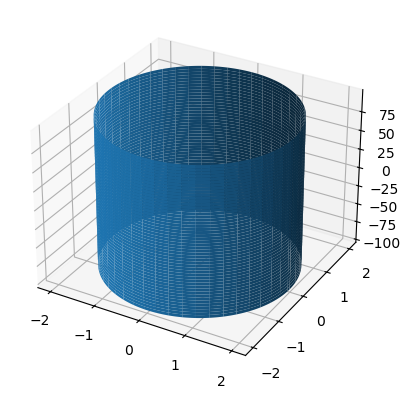

In [39]:
theta = np.arange(0, 2*np.pi, 0.01)
z_ = np.arange(-100,100,0.01)


r = np.sqrt(4)

theta, z_ = np.meshgrid(theta, z_)

x = r * np.cos(theta)
y = r * np.sin(theta)
z= z_

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x, y, z, )
plt.show()

## Lei de Couloumb e Campo Eletrico

In [44]:
import numpy as np
import plotly.graph_objs as go


def calcular_vetor_posicao(x0, y0, z0, x, y, z):
    """Calcula o vetor posição entre dois pontos."""
    vetor_posicao = np.array([x - x0, y - y0, z - z0])
    return vetor_posicao


def plotar_pontos_3d(coordenadas):
    """Plota os pontos no espaço tridimensional."""
    fig = go.Figure()

    for i, (x, y, z) in enumerate(coordenadas, start=1):
        nome_carga = f"q{i}"
        cor = f"rgb({30 * i}, {50 * i}, {70 * i})"
        fig.add_trace(
            go.Scatter3d(
                x=[x],
                y=[y],
                z=[z],
                mode="markers",
                name=nome_carga,
                marker=dict(size=10, color=cor),
                text=nome_carga,
            )
        )

    fig.update_layout(
        scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
        title="Localização das Cargas",
    )
    fig.show()


# Exemplo de uso
coordenadas = np.array([[0, 3, 1], [3, 2, -1], [-1, -1, 4]])

plotar_pontos_3d(coordenadas)

calcular_vetor_posicao(
    coordenadas[0][0], coordenadas[0][1], coordenadas[0][2], coordenadas[1][0], coordenadas[1][1], coordenadas[1][2]
)

array([ 3, -1, -2])

In [47]:
import numpy as np
import plotly.graph_objs as go


def calcular_forca_electrica(q1, q2, x1, y1, z1, x2, y2, z2):
    """Calcula a força elétrica entre duas cargas."""
    k = 8.99e9  # Constante eletrostática em N.m^2/C^2

    # Calcula a distância entre as cargas
    r = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)

    # Calcula o vetor posição
    r_vec = np.array([x2 - x1, y2 - y1, z2 - z1])

    # Calcula a força elétrica
    F = k * (q1 * q2) / r**2

    # Calcula o vetor força
    F_vec = (F * r_vec) / r

    return F_vec


def plotar_vetores(coordenadas, q1, q2):
    """Plota os vetores força no espaço tridimensional."""
    fig = go.Figure()

    for i, (x, y, z) in enumerate(coordenadas, start=1):
        nome_carga = f"q{i}"
        cor = f"rgb({30 * i}, {50 * i}, {70 * i})"
        fig.add_trace(
            go.Scatter3d(
                x=[x],
                y=[y],
                z=[z],
                mode="markers",
                name=nome_carga,
                marker=dict(size=10, color=cor),
                text=nome_carga,
            )
        )

    for i, (x, y, z) in enumerate(coordenadas[1:], start=1):
        F_vec = calcular_forca_electrica(
            q1, q2, coordenadas[0][0], coordenadas[0][1], coordenadas[0][2], x, y, z
        )
        fig.add_trace(
            go.Scatter3d(
                x=[coordenadas[0][0], coordenadas[0][0] + F_vec[0]],
                y=[coordenadas[0][1], coordenadas[0][1] + F_vec[1]],
                z=[coordenadas[0][2], coordenadas[0][2] + F_vec[2]],
                mode="lines",
                name=f"F{3}{i}",
                marker=dict(size=2),
                line=dict(color=f"rgb({255 * i}, {100 * i}, {50 * i})"),
            )
        )

    fig.update_layout(
        scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
        title="Forças Elétricas",
    )
    fig.show()


# Exemplo de uso
coordenadas = np.array([[0, 3, 1], [3, 2, -1], [-1, -1, 4]])
q1 = 1e-3  # 1 mC
q2 = -2e-3  # -2 mC

plotar_vetores(coordenadas, q1, q2)


def calcular_forcas_eletricas(q1, q2, coordenadas, k=8.9875e9):
    """Calcula as forças elétricas entre a carga q3 e as outras cargas."""
    forca_total = np.zeros(3)  # Vetor para armazenar a força total sobre q3
    for i in range(1, len(coordenadas)):
        x1, y1, z1 = coordenadas[0]
        x2, y2, z2 = coordenadas[i]

        # Calcula a distância entre as cargas
        r = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)

        # Calcula o vetor posição
        r_vec = np.array([x2 - x1, y2 - y1, z2 - z1])

        # Calcula a força elétrica
        F = k * (q1 * q2) / r**2

        # Calcula o vetor força
        F_vec = (F * r_vec) / r

        forca_total += F_vec

    return forca_total


# Exemplo de uso
forca_total = calcular_forcas_eletricas(q1, q2, coordenadas)
print("Força elétrica total sobre q3:", forca_total)

calcular_forca_electrica(q1, q2, coordenadas[0][0], coordenadas[0][1], coordenadas[0][2], coordenadas[1][0], coordenadas[1][1], coordenadas[1][2])

Força elétrica total sobre q3: [-893.84889785  885.48088747  279.53628185]


array([-1029.71938491,   343.23979497,   686.47958994])

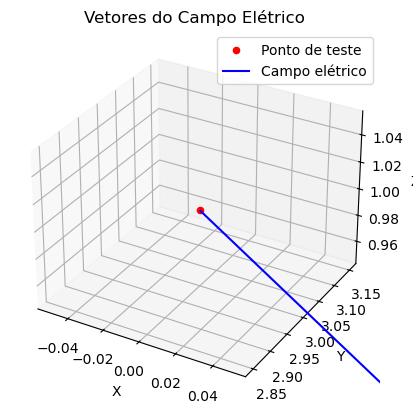

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Constante eletrostática (N m^2/C^2)
k = 8.9875e9

# Posições das cargas pontuais
pos_q1 = np.array([3, 2, -1])
pos_q2 = np.array([-1, -1, 4])
pos_test = np.array([0, 3, 1])

# Cargas das cargas pontuais (mC)
q1 = 1e-3
q2 = -2e-3
q_test = 10e-9  # 10 nC

# Vetores posição do ponto de teste para as cargas pontuais
r1 = pos_q1 - pos_test
r2 = pos_q2 - pos_test

# Distâncias entre o ponto de teste e as cargas pontuais
dist_r1 = np.linalg.norm(r1)
dist_r2 = np.linalg.norm(r2)

# Vetores unitários na direção das cargas pontuais
hat_r1 = r1 / dist_r1
hat_r2 = r2 / dist_r2

# Forças elétricas devido a cada carga pontual
F1 = k * (q1 * q_test) / (dist_r1**2) * hat_r1
F2 = k * (q2 * q_test) / (dist_r2**2) * hat_r2

# Força elétrica resultante
F_total = F1 + F2

# Intensidade do campo elétrico resultante
E = F_total / q_test

# Plotar os vetores do campo elétrico
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Posição do ponto de teste
ax.scatter(pos_test[0], pos_test[1], pos_test[2], color="r", label="Ponto de teste")

# Vetores do campo elétrico
ax.quiver(
    pos_test[0],
    pos_test[1],
    pos_test[2],
    E[0],
    E[1],
    E[2],
    color="b",
    length=1e-6,
    label="Campo elétrico",
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Vetores do Campo Elétrico")
ax.legend()

plt.show()

In [48]:
import numpy as np


def calcular_vetor_posicao(r1, r2):
    # Calcula a diferença de posição
    delta_x = r2[0] - r1[0]
    delta_y = r2[1] - r1[1]
    delta_z = r2[2] - r1[2]

    # Calcula o vetor posição
    R = np.array([delta_x, delta_y, delta_z])

    return R


def calcular_magnitude_vetor(R):
    # Calcula a magnitude do vetor posição
    magnitude = np.linalg.norm(R)

    return magnitude


def calcular_vetor_unitario(R):
    # Calcula o vetor unitário
    magnitude = calcular_magnitude_vetor(R)
    vetor_unitario = R / magnitude

    return vetor_unitario


# Coordenadas dos pontos r1 e r2
r1 = [0, 1, 0]
r2 = [0, 1, 1]

# Calcula o vetor posição
vetor_posicao = calcular_vetor_posicao(r1, r2)
print("Vetor Posição:", vetor_posicao)

# Calcula a magnitude do vetor posição
magnitude_vetor = calcular_magnitude_vetor(vetor_posicao)
print("Magnitude do Vetor Posição:", magnitude_vetor)

# Calcula o vetor unitário
vetor_unitario = calcular_vetor_unitario(vetor_posicao)
print("Vetor Unitário:", vetor_unitario)

Vetor Posição: [0 0 1]
Magnitude do Vetor Posição: 1.0
Vetor Unitário: [0. 0. 1.]


/tmp/ipykernel_20345/332696724.py:46: RuntimeWarning:

invalid value encountered in divide



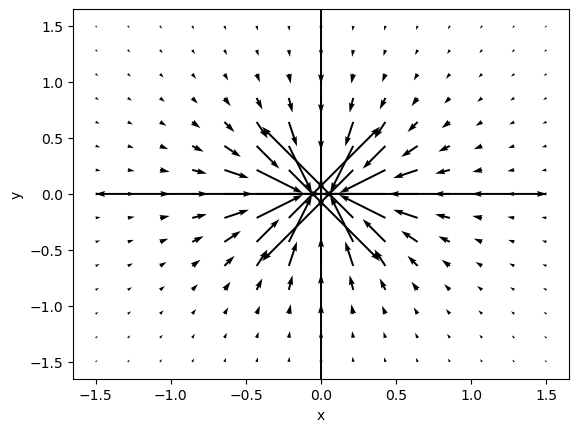

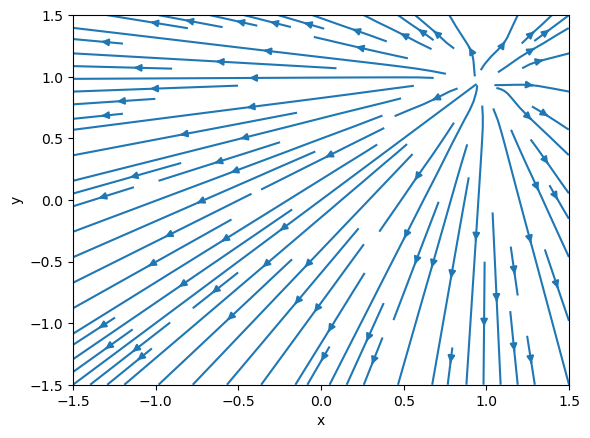

In [41]:
# Exemplo de uso
eletromagnetismo = EletroMagnetismo()

# Plot do campo gravitacional
eletromagnetismo.plot_campo([0, 0], campo="gravitacional")

# Plot do campo elétrico com uma carga positiva em (1, 1) de 10 nC
eletromagnetismo.plot_campo([1, 1, 10e-9], campo="eletrico")